In [1]:
# Defining the Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# EXPLORATORY DATA ANALYSIS
## Data Understanding, Cleaning and Preparation

In [2]:
# Load the data
data = pd.read_csv('Leads.csv')

### Initial data overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
data.shape

(9240, 37)

In [7]:
# Detailed analysis of missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
# Combine into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display only rows where there are missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)

                                               Missing Values  Percentage
Lead Source                                                36    0.389610
TotalVisits                                               137    1.482684
Page Views Per Visit                                      137    1.482684
Last Activity                                             103    1.114719
Country                                                  2461   26.634199
Specialization                                           1438   15.562771
How did you hear about X Education                       2207   23.885281
What is your current occupation                          2690   29.112554
What matters most to you in choosing a course            2709   29.318182
Tags                                                     3353   36.287879
Lead Quality                                             4767   51.590909
Lead Profile                                             2709   29.318182
City                                  

In [8]:
# Identify categorical variables with 'Select' as a placeholder for missing data
select_as_missing = (data == 'Select').sum()
print("Count of 'Select' as placeholder:\n", select_as_missing)

Count of 'Select' as placeholder:
 Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                       

In [9]:
# Select and Missing data

select_missing_data = select_as_missing+missing_values
select_missing_per = (select_missing_data/ len(data)) * 100
# Combine into a DataFrame
Select_missing_data = pd.DataFrame({
    'Sel & Miss Values': select_missing_data,
    'Percentage': select_missing_per
})

# Display only rows where there are missing values
Select_missing_data = Select_missing_data[Select_missing_data['Sel & Miss Values'] > 0]
print(Select_missing_data.sort_values('Percentage'))

                                               Sel & Miss Values  Percentage
Lead Source                                                   36    0.389610
Last Activity                                                103    1.114719
TotalVisits                                                  137    1.482684
Page Views Per Visit                                         137    1.482684
Country                                                     2461   26.634199
What is your current occupation                             2690   29.112554
What matters most to you in choosing a course               2709   29.318182
Tags                                                        3353   36.287879
Specialization                                              3380   36.580087
City                                                        3669   39.707792
Asymmetrique Activity Score                                 4218   45.649351
Asymmetrique Activity Index                                 4218   45.649351

In [10]:
# Load the data dictionary
data_dict = pd.read_excel('Leads Data Dictionary.xlsx', header=2, usecols='B:C')

In [11]:
data_dict.head(40)

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...
5,Do Not Call,An indicator variable selected by the customer...
6,Converted,The target variable. Indicates whether a lead ...
7,TotalVisits,The total number of visits made by the custome...
8,Total Time Spent on Website,The total time spent by the customer on the we...
9,Page Views Per Visit,Average number of pages on the website viewed ...


## Handling Missing Data

#### The following columns have a high number of missing or select place holder infomation
    Field | Missing /Select Values | Percentage Missing
    1. Tags                                                        3353   36.287879
    2. Specialization                                              3380   36.580087
    3. City                                                        3669   39.707792
    4. Asymmetrique Activity Score                                 4218   45.649351
    5. Asymmetrique Activity Index                                 4218   45.649351
    6. Asymmetrique Profile Index                                  4218   45.649351
    7. Asymmetrique Profile Score                                  4218   45.649351
    8. Lead Quality                                                4767   51.590909
    9. Lead Profile                                                6855   74.188312
    10. How did you hear about X Education                          7250   78.463203

##### Dropping the column with very high missing values (>40%)


In [12]:
data.drop(['How did you hear about X Education'], axis=1, inplace=True)

In [13]:
data.drop(['Lead Profile'], axis=1, inplace=True)

In [14]:
data.drop(['Lead Quality'], axis=1, inplace=True)

In [15]:
data.drop(['Asymmetrique Profile Score'], axis=1, inplace=True)

In [16]:
data.drop(['Asymmetrique Profile Index'], axis=1, inplace=True)

In [17]:
data.drop(['Asymmetrique Activity Index'], axis=1, inplace=True)

In [18]:
data.drop(['Asymmetrique Activity Score'], axis=1, inplace=True)

In [19]:
# Reassessing the shape of the data set
data.shape

(9240, 30)

##### Missing data handling
The following still consists of missing information up to 39%
    0. Field                                           Sel & Miss Values  Percentage
    1. Lead Source                                                   36    0.389610
    2. Last Activity                                                103    1.114719
    4. TotalVisits                                                  137    1.482684
    5. Page Views Per Visit                                         137    1.482684
    6. Country                                                     2461   26.634199
    7. What is your current occupation                             2690   29.112554
    8. What matters most to you in choosing a course               2709   29.318182
    9. Tags                                                        3353   36.287879
    10. Specialization                                              3380   36.580087
    11. City                                                        3669   39.707792

This is a lot of information and removing the respective columns or rows cannot be determined at this time. 
To better handle this, all "NA" and "Select" value will ne replaced with "Not Provided" to make it easy to 
identify during data analysis and handle in case of exception

In [20]:
# Replace missing values and 'Select' with 'Not Provided' for object type columns
columns_with_missing_data = [
    'Lead Source', 'Last Activity',  
    'Country', 'What is your current occupation', 'What matters most to you in choosing a course',
    'Tags', 'Specialization', 'City'
]

for column in columns_with_missing_data:
    data[column] = data[column].fillna('Not Provided').replace('Select', 'Not Provided')
    


In [21]:
#REpalce missing values in numerical columns 'TotalVisits','Page Views Per Visit' with median values
# Calculate medians
total_visits_median = data['TotalVisits'].median()
page_views_per_visit_median = data['Page Views Per Visit'].median()

# Replace missing values with medians
data['TotalVisits'].fillna(total_visits_median, inplace=True)
data['Page Views Per Visit'].fillna(page_views_per_visit_median, inplace=True)

In [22]:
data.shape

(9240, 30)

In [23]:
# Check again for select / missing data
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
# Combine into a DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

select_as_missing = (data == 'Select').sum()

select_missing_data = select_as_missing+missing_values
select_missing_per = (select_missing_data/ len(data)) * 100
# Combine into a DataFrame
Select_missing_data = pd.DataFrame({
    'Sel & Miss Values': select_missing_data,
    'Percentage': select_missing_per
})

# Display only rows where there are missing values
Select_missing_data = Select_missing_data[Select_missing_data['Sel & Miss Values'] > 0]
print(Select_missing_data.sort_values('Percentage'))

Empty DataFrame
Columns: [Sel & Miss Values, Percentage]
Index: []


### Univariate Analysis

In [24]:
# Identify numerical and categorical columns based on their data type
numerical_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in ['Lead Number', 'Converted']]
categorical_cols = [col for col in data.columns if (data[col].dtype == 'object' or col == 'Converted') and col != 'Prospect ID']
## Removing Lead Number and Prospect ID from the univariate analysis. 
## Added converted (boolean) field to categorical columns

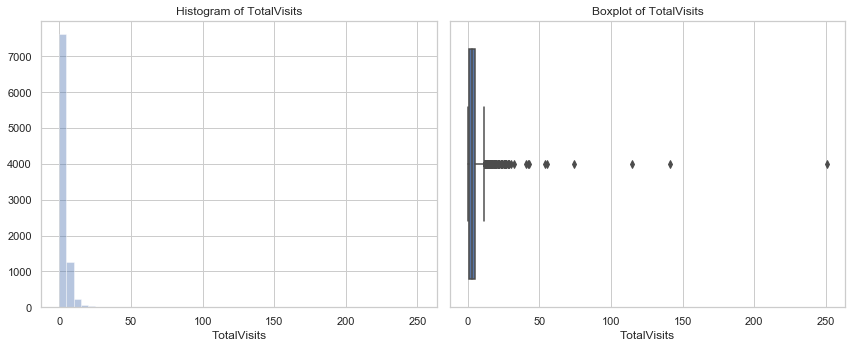

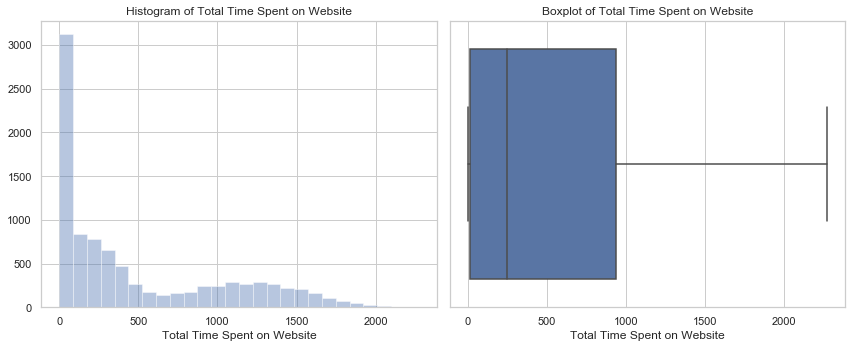

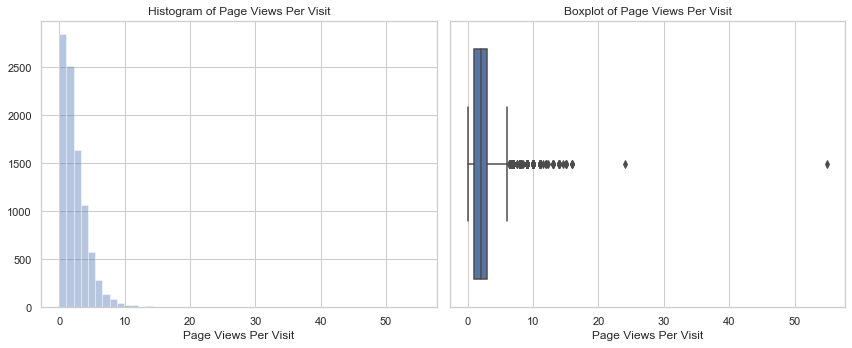

In [25]:
# Plotting settings
sns.set(style="whitegrid")

# Plot histograms and boxplots for numerical data
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[col], kde=False)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

In [26]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9240.0,3.438636,4.819024,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9240.0,2.357440,2.145781,0.0,1.0,2.0,3.00,55.0


###### In case of Total Visists and "Page views per visit", outliers exists
    1. for Total Visit - outlier exists above 150
    2. for Page views per visit - Outlier exists above 20

In [27]:
data = data[data['TotalVisits'] < 150]

In [28]:
data = data[data['Page Views Per Visit'] < 20]

##### Redoing the numerical plot

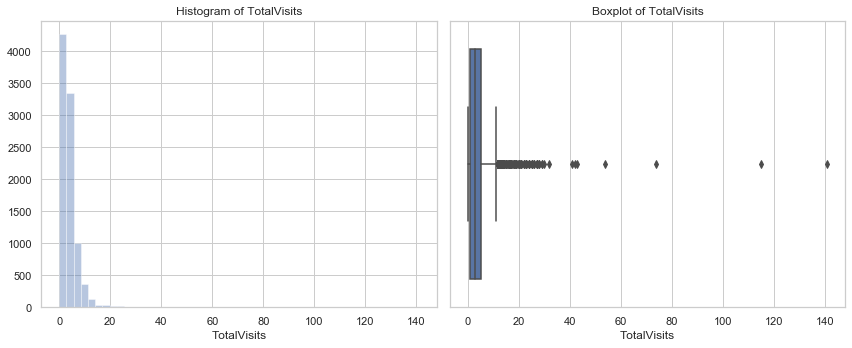

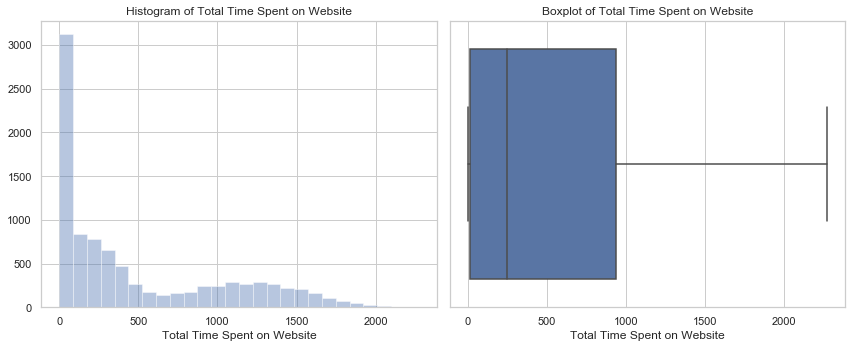

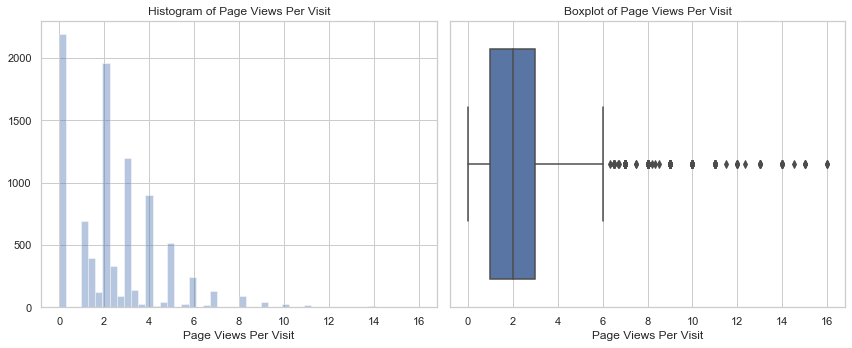

In [29]:

# Plotting settings
sns.set(style="whitegrid")

# Plot histograms and boxplots for numerical data
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.distplot(data[col], kde=False)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

##### Plotting the Categorical variables

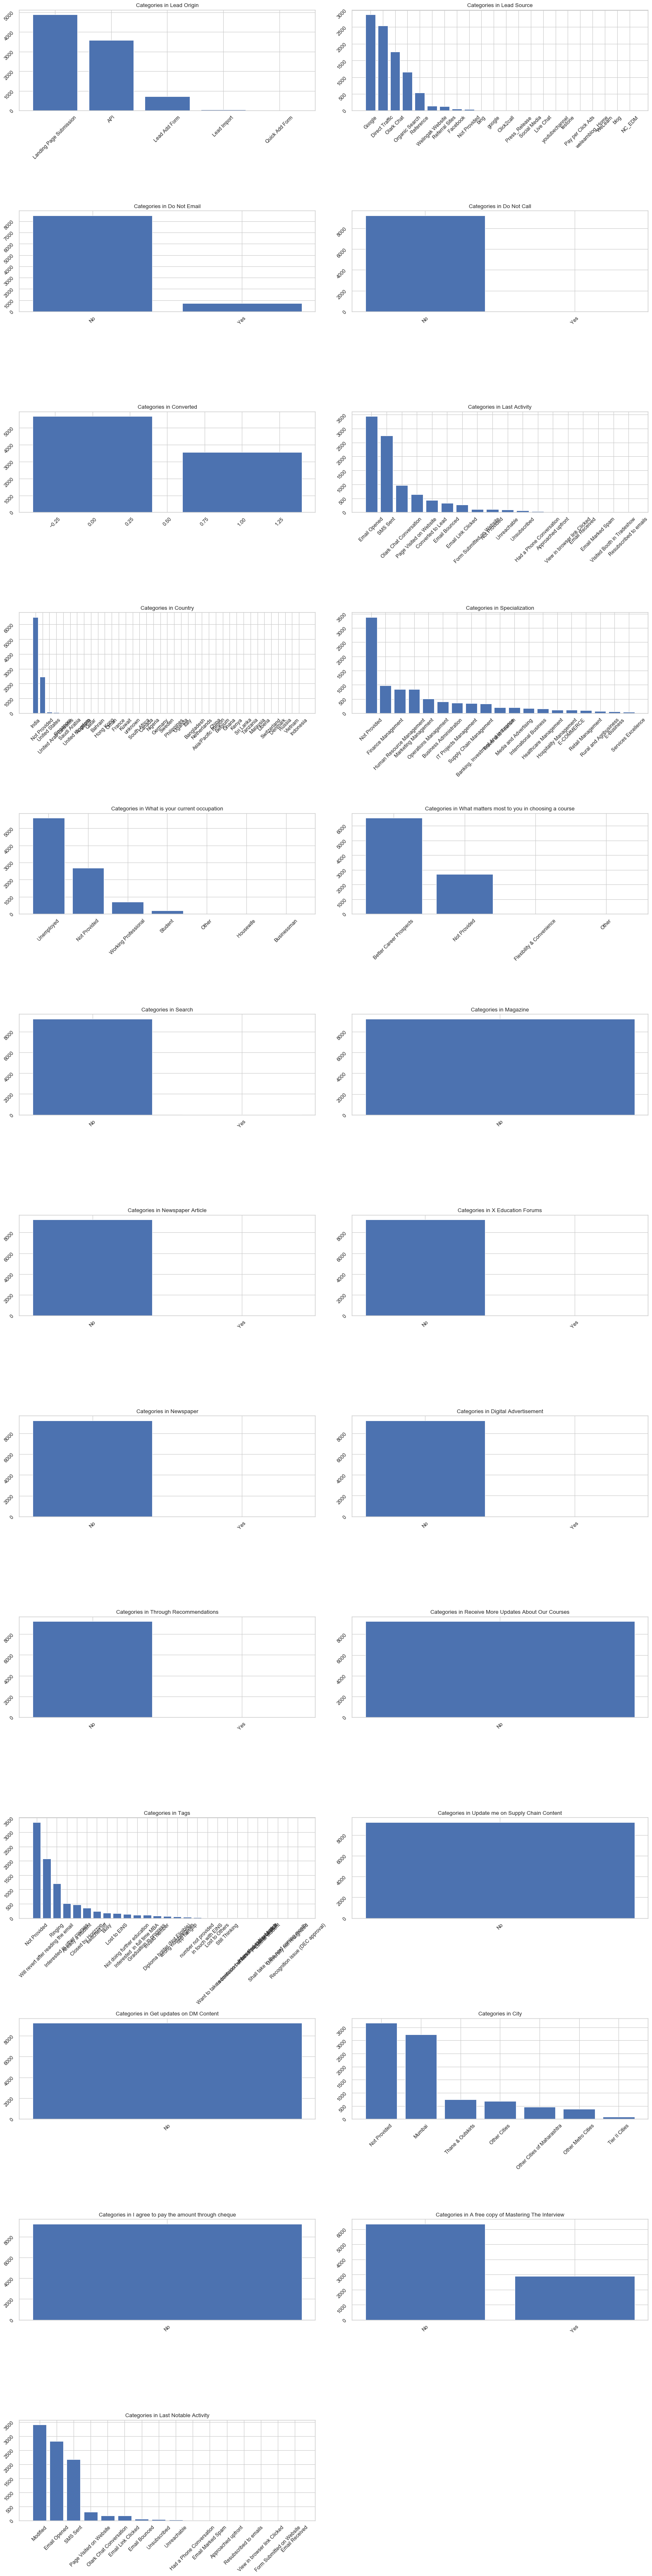

In [30]:
# Calculate the number of rows needed, assuming 2 columns per row
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10 * n_cols, 6 * n_rows),  dpi=80)

# Flatten the axes array for easier iteration if there's more than one row
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = data[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'Categories in {col}')
    axes[i].tick_params(labelrotation=45)  # Rotate labels for better readability

# Hide any unused axes if the number of plots isn't exactly filling the grid
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### The following categorical columns may be excluded as they are the same for the entire data set
         
     'Magazine' - Entire data value is "No"     
     'Receive More Updates About Our Courses' - Entire Data set is "No"
     'Update me on Supply Chain Content' - Entire Data set is "No"
     'Get updates on DM Content' - Entire Data set is "No"
     'I agree to pay the amount through cheque' - Entire Data set is "No"

In [31]:
## Verifying the above analysis and removing the columns
# List of specific columns you mentioned to check and remove
columns_to_check = [
    'Magazine', 
    'Receive More Updates About Our Courses', 
    'Update me on Supply Chain Content', 
    'Get updates on DM Content', 
    'I agree to pay the amount through cheque'
]

# Check each column and drop it if it contains only one unique value
for column in columns_to_check:
    if len(data[column].unique()) == 1:
        data.drop(column, axis=1, inplace=True)
        print(f"Column {column} dropped, as it contains only one unique value.")

# Verify the remaining columns in the dataset
print(data.columns)

Column Magazine dropped, as it contains only one unique value.
Column Receive More Updates About Our Courses dropped, as it contains only one unique value.
Column Update me on Supply Chain Content dropped, as it contains only one unique value.
Column Get updates on DM Content dropped, as it contains only one unique value.
Column I agree to pay the amount through cheque dropped, as it contains only one unique value.
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object

In [32]:
# Update the list of categorical columns
categorical_cols = [col for col in data.columns if data[col].dtype == 'object' and col not in columns_to_check]

### Bivatriate analysis with 'converted' column

##### Bivariate analysis for numerical columns

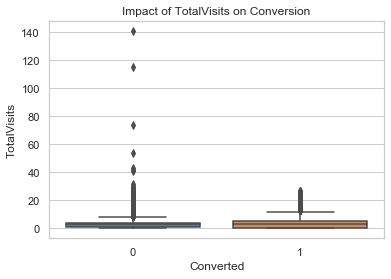

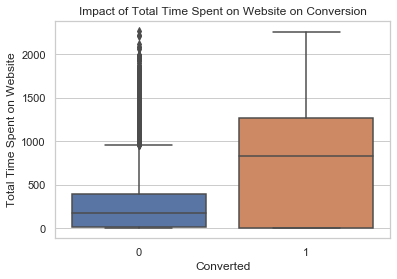

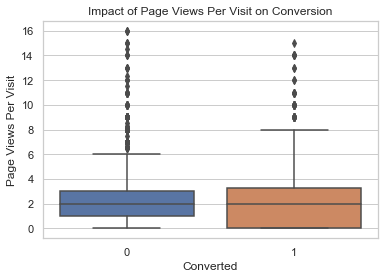

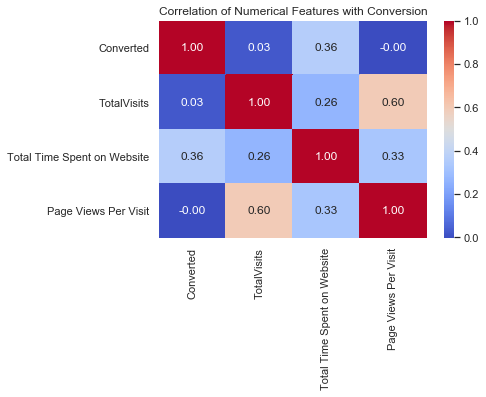

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plots for each numerical variable against 'Converted'
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Converted', y=col, data=data)
    plt.title(f'Impact of {col} on Conversion')
    plt.show()

# Correlation Matrix with Heatmap
correlation = data[['Converted', *numerical_cols]].corr()  # assuming numerical_cols excludes 'Converted'
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Numerical Features with Conversion')
plt.show()

##### Bivariate analysis for Categorical columns

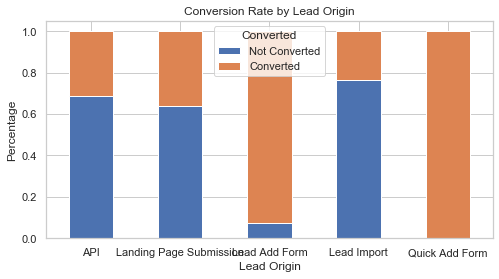

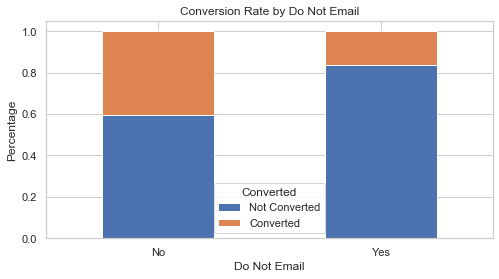

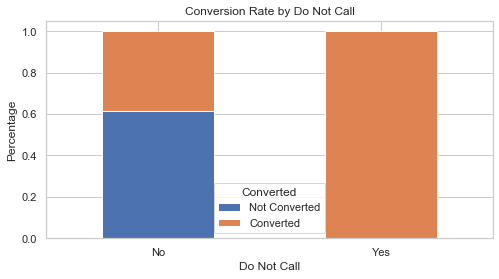

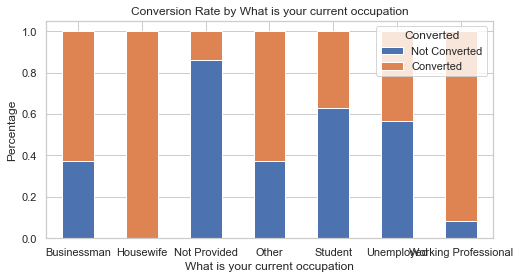

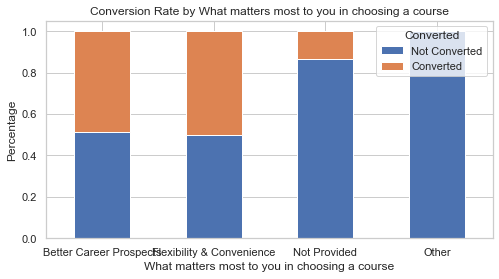

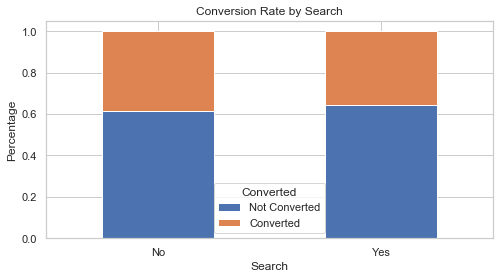

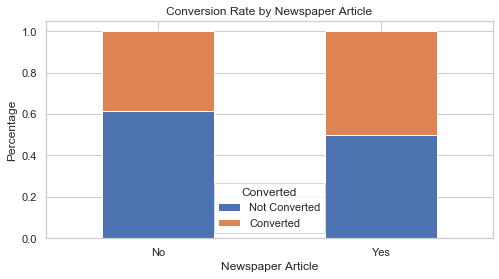

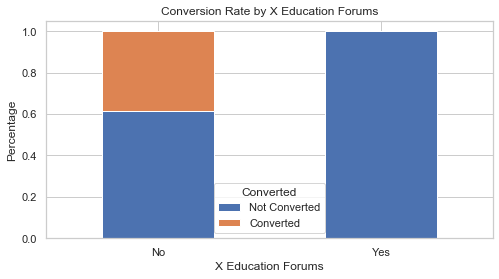

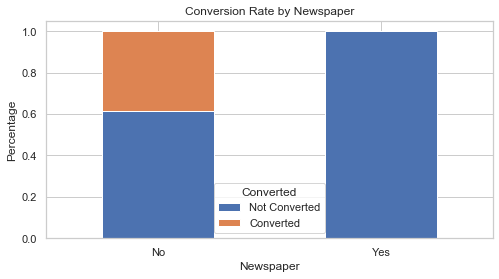

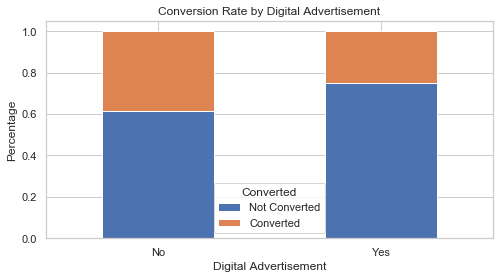

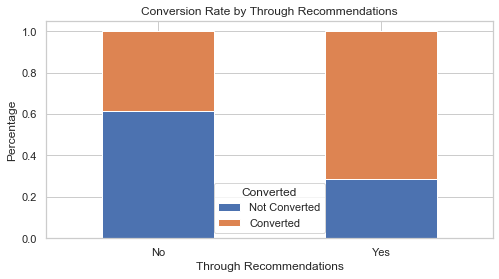

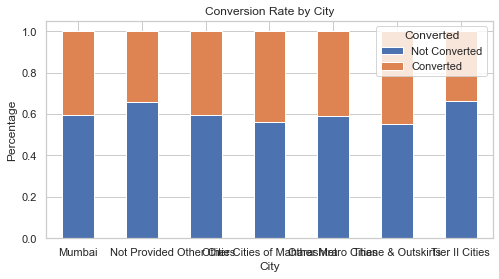

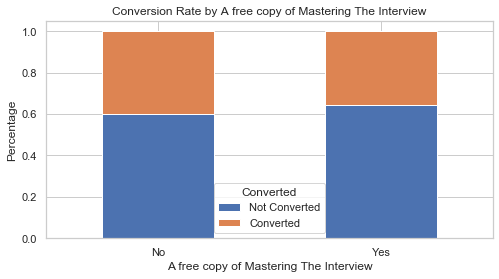

In [34]:
# Example of a stacked bar chart for a categorical variable
for col in categorical_cols:
    if data[col].nunique() <= 10:  # Limit this to categorical variables with not too many unique categories
        contingency_table = pd.crosstab(data[col], data['Converted'])
        contingency_table_pct = contingency_table.div(contingency_table.sum(1), axis=0)
        contingency_table_pct.plot(kind='bar', stacked=True, figsize=(8, 4))
        plt.title(f'Conversion Rate by {col}')
        plt.ylabel('Percentage')
        plt.xlabel(col)
        plt.legend(title='Converted', labels=['Not Converted', 'Converted'])
        plt.xticks(rotation=0)
        plt.show()
